# **Student Dropout Prediction**  
> **Research Paper:** A Machine Learning Approach to Detect Student Dropout at University by Shohag & Bakaul (2021) 

#### **Group Members**  
- Ameni Boughanmi  
- Mouna Tounakti

#### **Task Distribution**  
| Member | Tasks |
|---------|------------------|
| Ameni Boughanmi | Data Exploration + Data Pre-processing  |
| Mouna Tounakti | Model Training + Model Evaluation |

#### **Dataset**  
- **Source:**  UCI *Student Dropout and Academic Success*  
- **Link:**  [A Machine Learning Approach to Detect Student Dropout at University (Shohag & Bakaul, 2021)](https://doi.org/10.30534/ijatcse/2021/041062021)

### **Objective**
Build and evaluate machine learning models that accurately predict **student dropout risk**.

---
---


## importations

In [1]:
import pandas as pd 
pd.set_option('expand_frame_repr', False)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score


## **Step 1:** Data Exploration

In [2]:
data = pd.read_csv('data.csv',sep=";")

In [ ]:
data.shape
#output : (number of lines, number of columns)

(4424, 37)

In [ ]:
#prints the first 5 lines of dataset
data.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### **Features Summary**
| Category | Features |
|-----------|-----------|
| **Personal / Demographic** | Marital status, Application mode, Application order, Nacionality, Gender, Age at enrollment, International |
| **Parental / Family Background** | Mother's qualification, Father's qualification, Mother's occupation, Father's occupation |
| **Academic / Admission** | Course, Daytime/evening attendance, Previous qualification, Previous qualification (grade), Admission grade, Displaced, Educational special needs, Scholarship holder |
| **Financial** | Debtor, Tuition fees up to date |
| **Academic Performance (1st Semester)** | Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations) |
| **Academic Performance (2nd Semester)** | Curricular units 2nd sem (credited), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (grade), Curricular units 2nd sem (without evaluations) |
| **Economic Context** | Unemployment rate, Inflation rate, GDP |


In [ ]:
#type of each column(feature)
data.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [ ]:
#shows how many students belong to each target class
data['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

`Graduated` = 2209  
`Dropout` + `Enrolled` ≈ 2215  
**=> balanced dataset**

In [ ]:
#check for missing values on each column
data.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

**=> dataset has no missing data**

### **Dataset Summmary**
- **Total Instances:** 4,424 students  
- **Total Features:** 36 attributes  
- **Target Variable (Label):** `Target` : indicates student status (`Dropout`, `Enrolled`, `Graduate`)  
- **Data Type:** All features are numerical, while the `Target` variable is categorical.

In [ ]:
#only keep the numerical data
features=data.loc[:,data.dtypes!=object] 


In [ ]:
#mean, median and mode for each feature
for column in features.columns:
  print('------------------------')
  print(features[column].mean())
  print(features[column].median())
  print(features[column].mode())

------------------------
1.1785714285714286
1.0
0    1
Name: Marital status, dtype: int64
------------------------
18.669077757685354
17.0
0    1
Name: Application mode, dtype: int64
------------------------
1.7278481012658229
1.0
0    1
Name: Application order, dtype: int64
------------------------
8856.642631103074
9238.0
0    9500
Name: Course, dtype: int64
------------------------
0.8908227848101266
1.0
0    1
Name: Daytime/evening attendance\t, dtype: int64
------------------------
4.577757685352622
1.0
0    1
Name: Previous qualification, dtype: int64
------------------------
132.6133137432188
133.1
0    133.1
Name: Previous qualification (grade), dtype: float64
------------------------
1.8731916817359855
1.0
0    1
Name: Nacionality, dtype: int64
------------------------
19.561934900542497
19.0
0    1
Name: Mother's qualification, dtype: int64
------------------------
22.275316455696203
19.0
0    37
Name: Father's qualification, dtype: int64
------------------------
10.960895117

**Interpretations**  

| Feature | Interpretation |
|----------|----------------|
| **Marital status** | most students are "single"|
| **Application order** |most students selected this course as theirnfirst choice|
| **Daytime/evening attendance** | most students attend daytime classes|
| **Previous qualification** | most students have similar previous education|
| **Previous qualification (grade)** | average previous grade ≈ 133 |
| **Nationality** | most students are domestic|
| **Mother’s qualification** | most mothers have the lowest qualification level|
| **Father’s qualification** | some fathers have higher education levels. |
| **Mother’s occupation** | mid-level job category. |
| **Father’s occupation** | slightly higher-level job category. |

---

| Feature | Interpretation |
|----------|----------------|
| **Displaced** | about half live away from home. |
| **Educational special needs** | almost none have special needs. |
| **Scholarship holder** | around 25% have scholarships. |
| **Age at enrollment** | students are mostly 20–23 years old. |
| **International** | very few international students. |

---

| Feature | Interpretation |
|----------|----------------|
| **1st sem credited / enrolled / evaluations** | Mean enrolled ≈ 6–8 → students take about **6–8 courses/semester**. |
| **1st sem approved** | Mean ≈ 4.7 → they pass about **4–5 courses** on average. |
| **1st sem grade** | Mean ≈ 10.6 → average grade around **10–12** (passing level). |
| **1st sem without evaluations** | Mean ≈ 0.13 → few skipped or missed courses. |
| **2nd sem credited / enrolled / evaluations** | Similar to 1st sem — stable academic load. |
| **2nd sem approved** | Mean ≈ 4.4 → students pass roughly **4–5 courses**. |
| **2nd sem grade** | Mean ≈ 10.2 → similar grade trend across semesters. |
| **2nd sem without evaluations** | Mean ≈ 0.15 → few missed evaluations. |

In [ ]:
# define a function to calculate IQR
# IQR = Q3 (75th percentile) - Q1 (25th percentile)
def interquartile_range(dat):
  return (dat.quantile(0.75)-dat.quantile(0.25))

In [ ]:
#calculate IQR for each feature 
for col in features:
    iqr_value = interquartile_range(data[col])
    print(f"IQR of {col}: {iqr_value}")

IQR of Marital status: 0.0
IQR of Application mode: 38.0
IQR of Application order: 1.0
IQR of Course: 471.0
IQR of Daytime/evening attendance	: 0.0
IQR of Previous qualification: 0.0
IQR of Previous qualification (grade): 15.0
IQR of Nacionality: 0.0
IQR of Mother's qualification: 35.0
IQR of Father's qualification: 34.0
IQR of Mother's occupation: 5.0
IQR of Father's occupation: 5.0
IQR of Admission grade: 16.900000000000006
IQR of Displaced: 1.0
IQR of Educational special needs: 0.0
IQR of Debtor: 0.0
IQR of Tuition fees up to date: 0.0
IQR of Gender: 1.0
IQR of Scholarship holder: 0.0
IQR of Age at enrollment: 6.0
IQR of International: 0.0
IQR of Curricular units 1st sem (credited): 0.0
IQR of Curricular units 1st sem (enrolled): 2.0
IQR of Curricular units 1st sem (evaluations): 4.0
IQR of Curricular units 1st sem (approved): 3.0
IQR of Curricular units 1st sem (grade): 2.4000000000000004
IQR of Curricular units 1st sem (without evaluations): 0.0
IQR of Curricular units 2nd sem (cr

C:\Users\YOGA\AppData\Local\Temp\ipykernel_1972\1315844956.py:9: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\YOGA\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


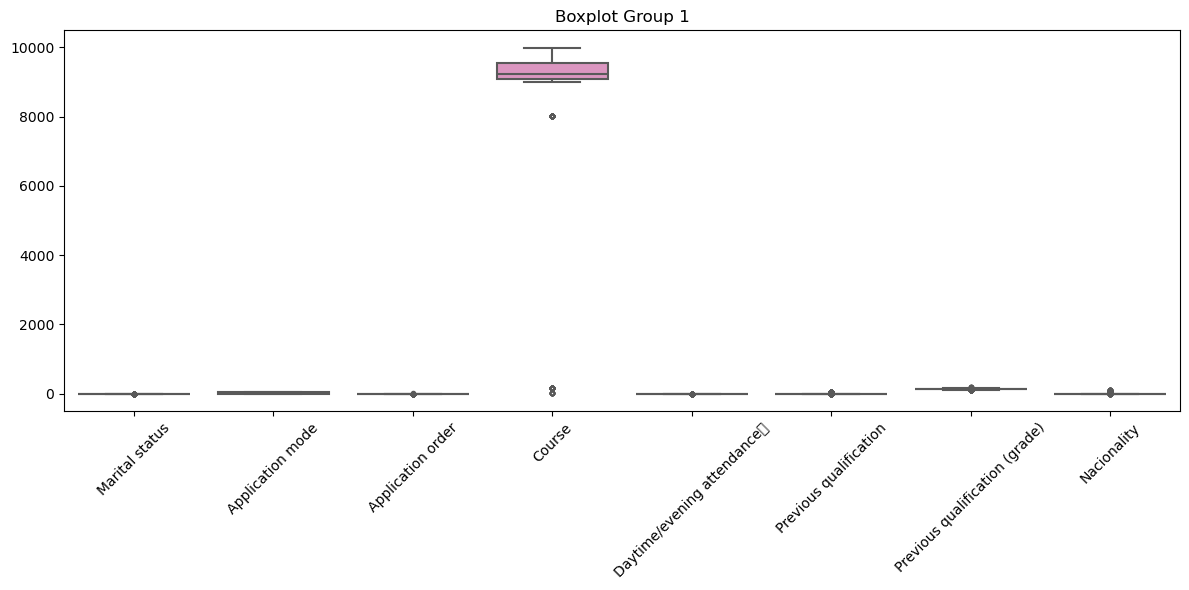

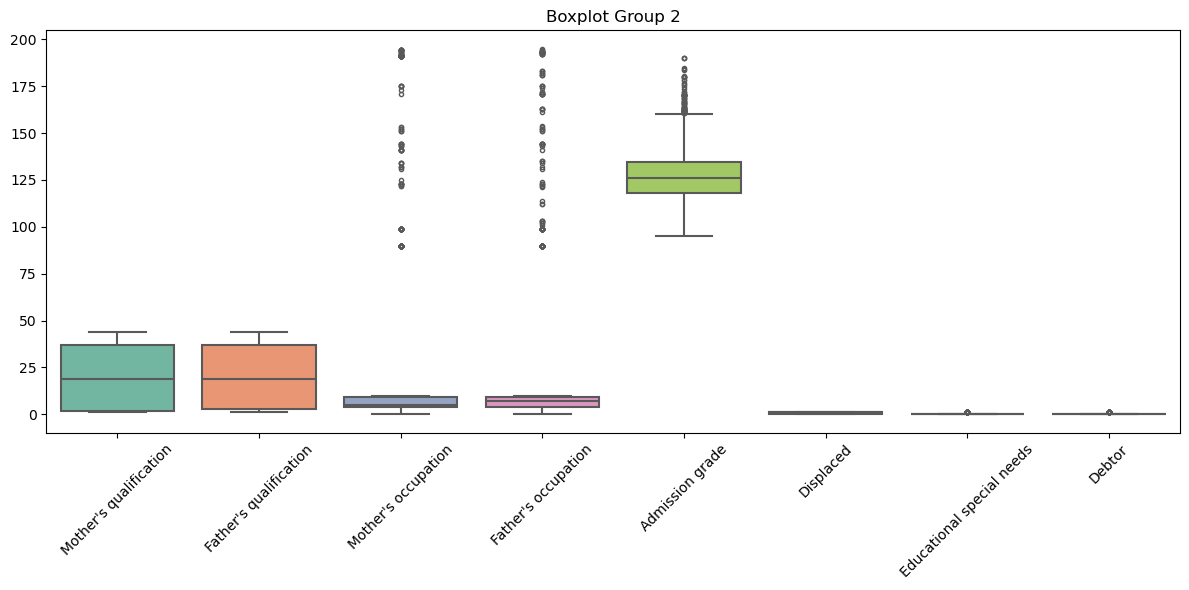

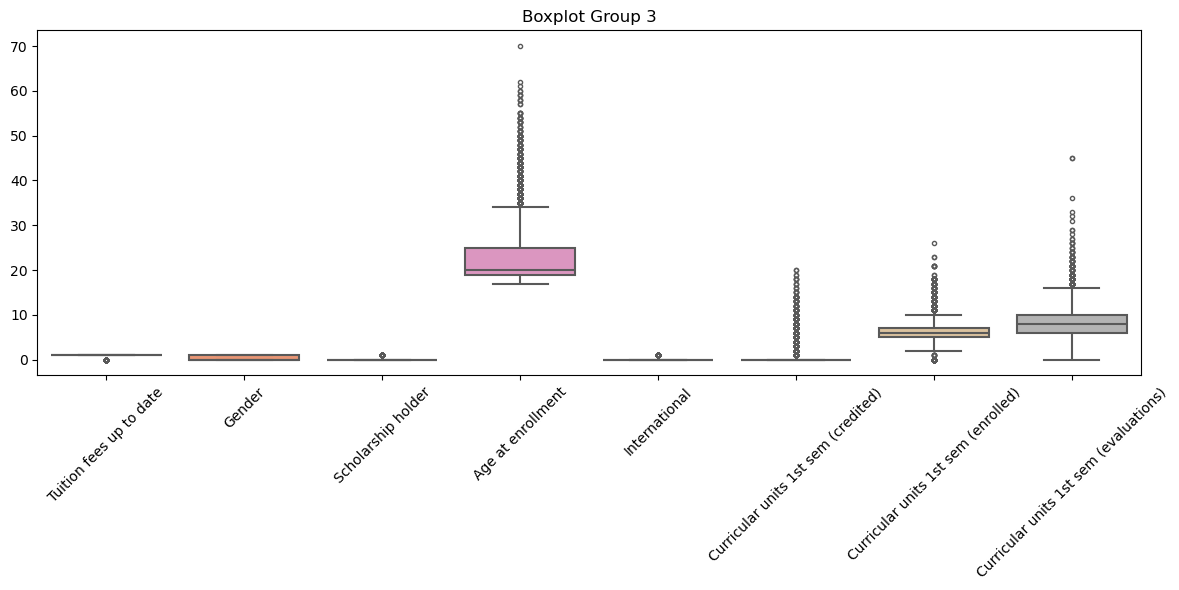

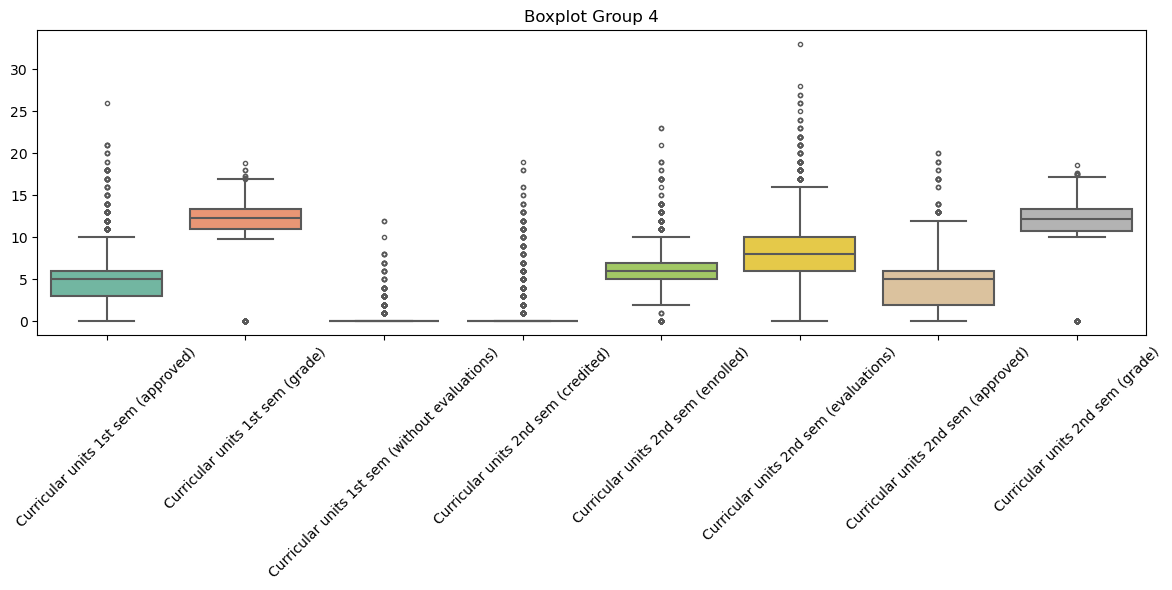

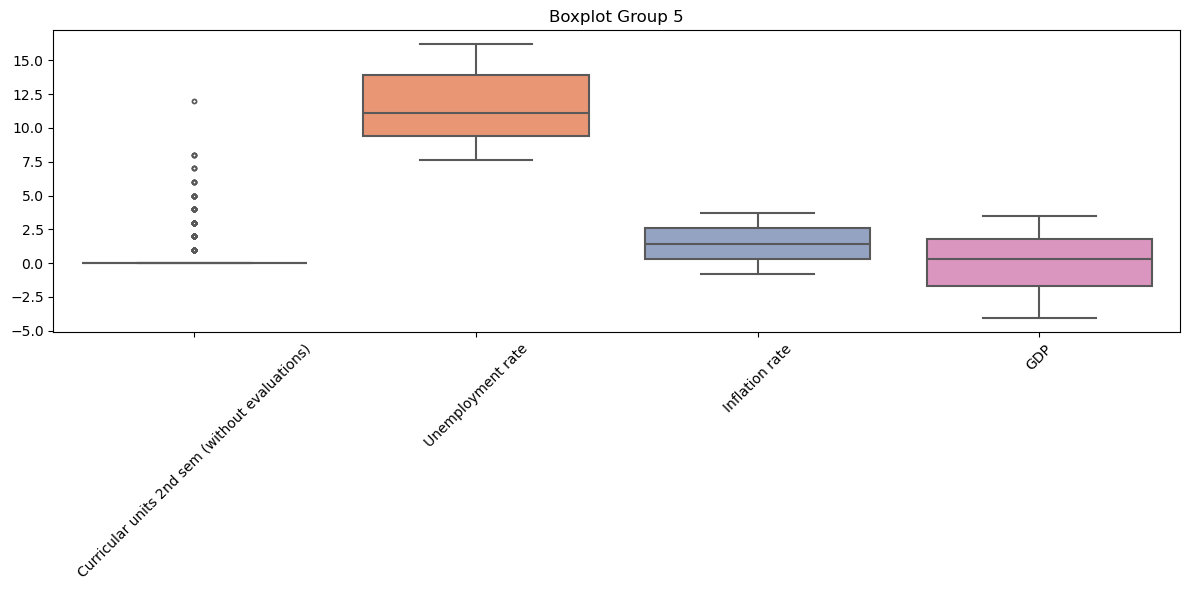

In [ ]:
#displaying the boxplots to identify outliers in the data
n = 8  
feature_groups = [features.columns[i:i+n] for i in range(0, len(features.columns), n)]

# -- Plot Boxplot --
for idx, group in enumerate(feature_groups):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=features[group], orient='v', palette='Set2', linewidth=1.5, fliersize=3)
    plt.title(f'Boxplot Group {idx+1}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# for column in features.columns:
#   features[column].plot()
#   plt.show()

Marital status


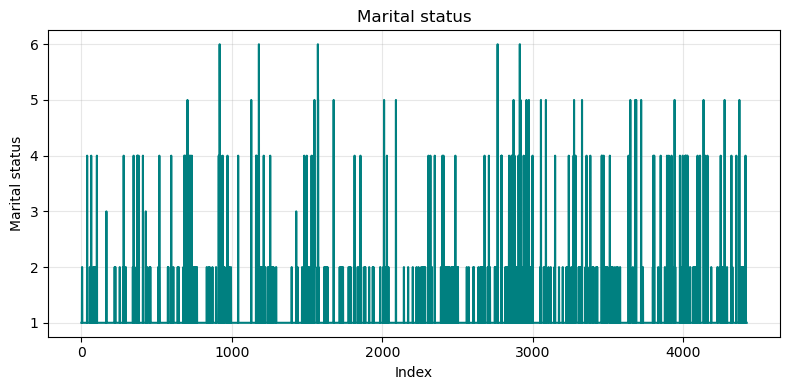

Application mode


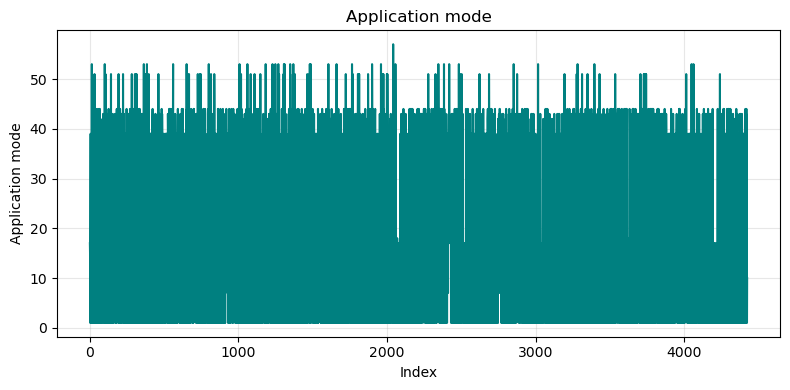

Application order


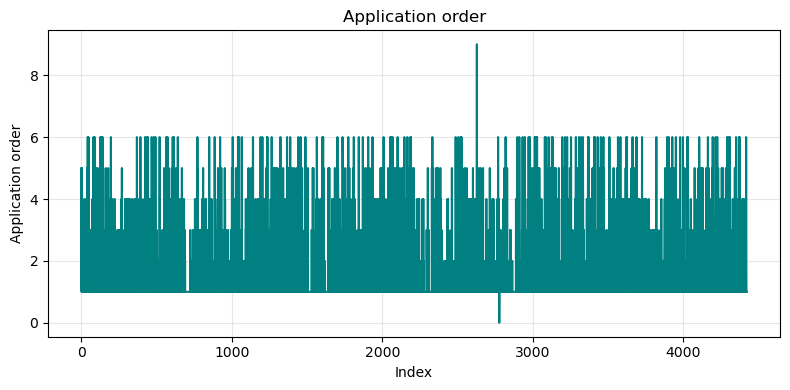

Course


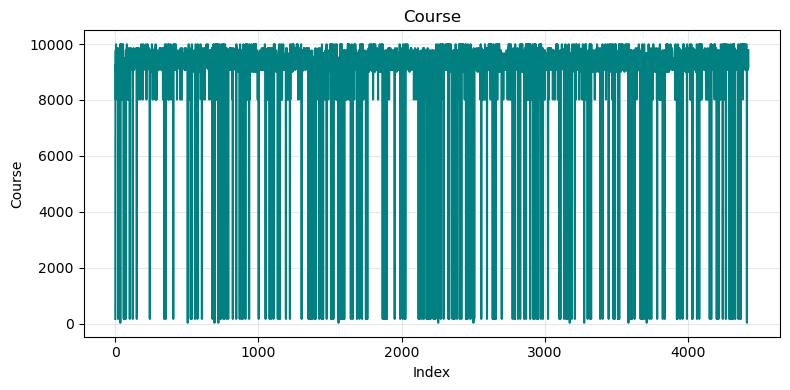

Daytime/evening attendance	


C:\Users\YOGA\AppData\Local\Temp\ipykernel_1972\658475696.py:11: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\YOGA\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


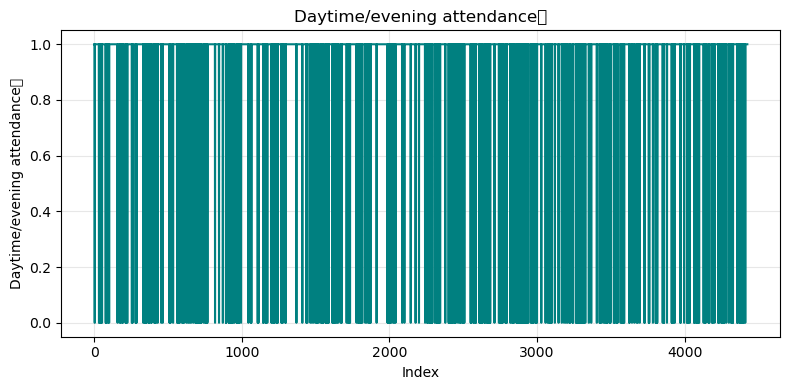

Previous qualification


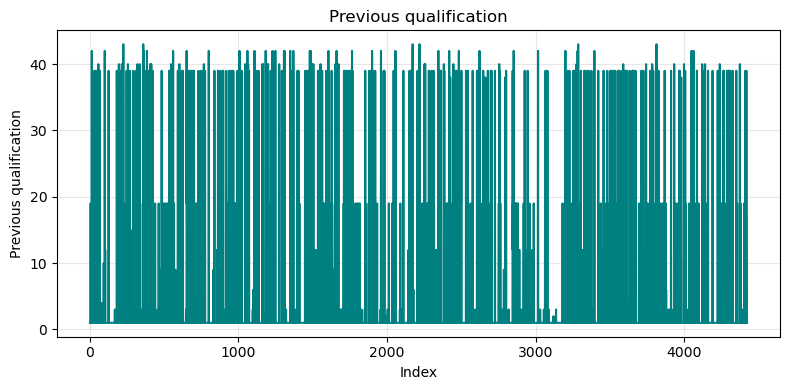

Previous qualification (grade)


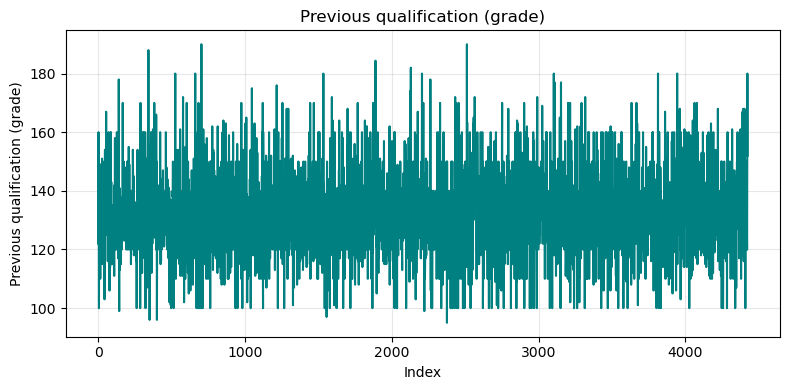

Nacionality


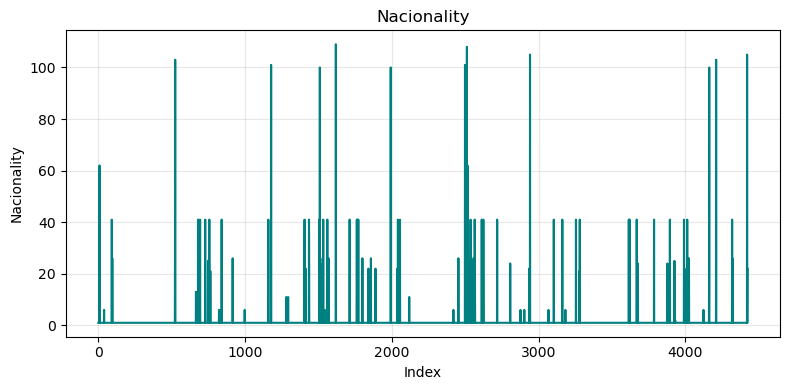

Mother's qualification


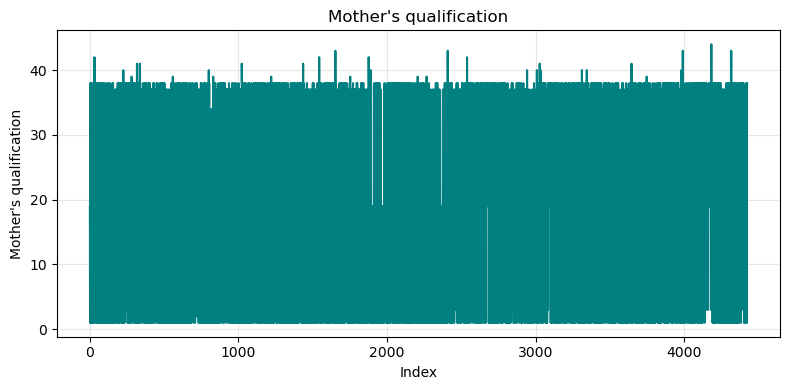

Father's qualification


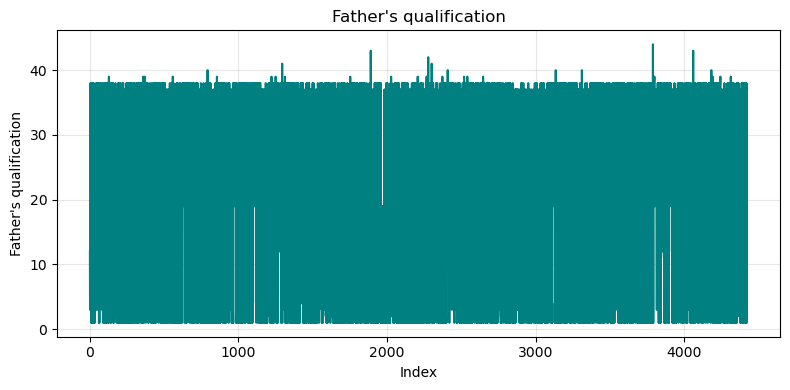

Mother's occupation


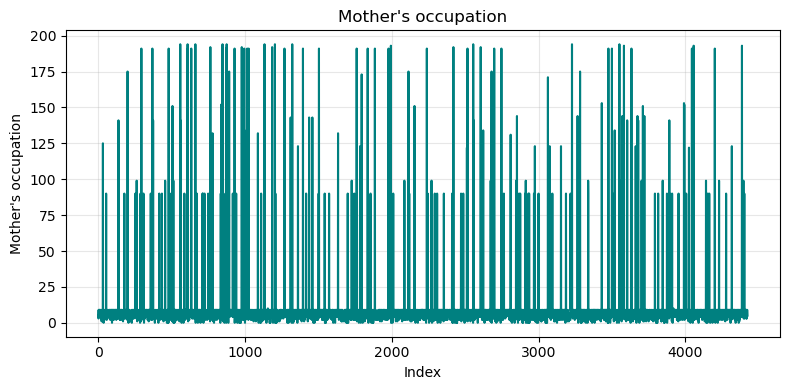

Father's occupation


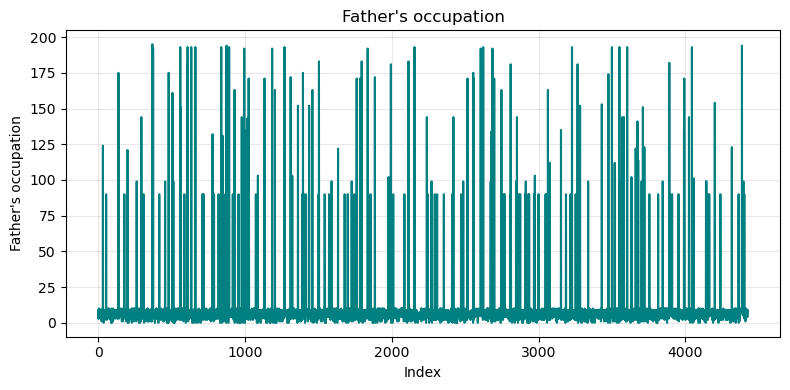

Admission grade


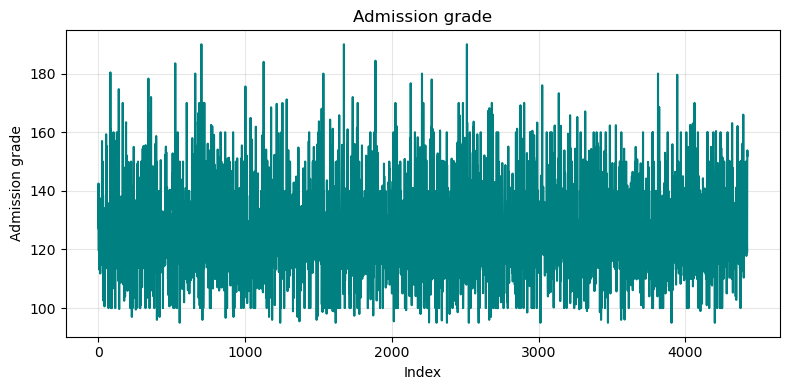

Displaced


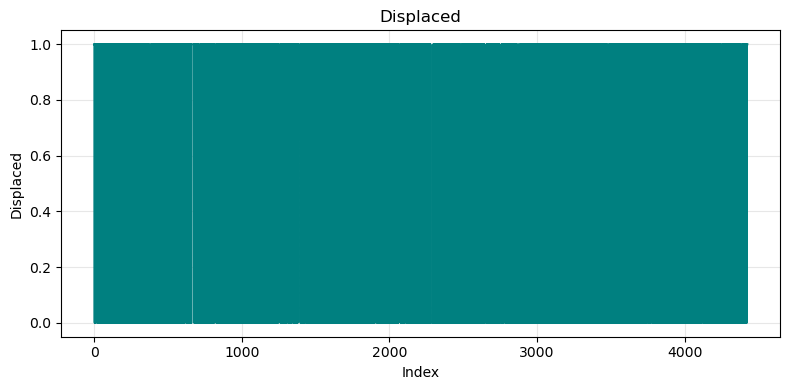

Educational special needs


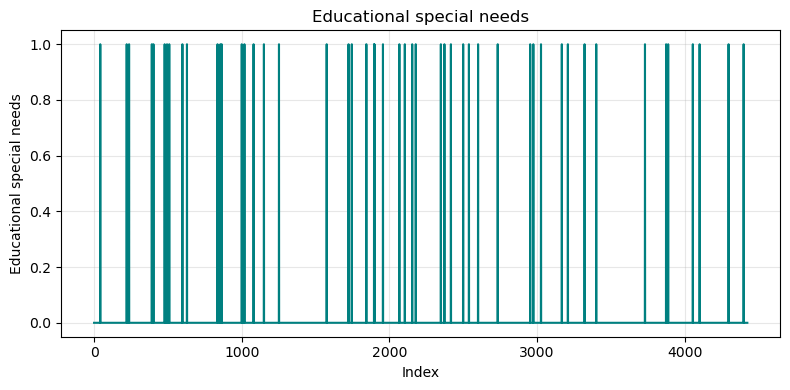

Debtor


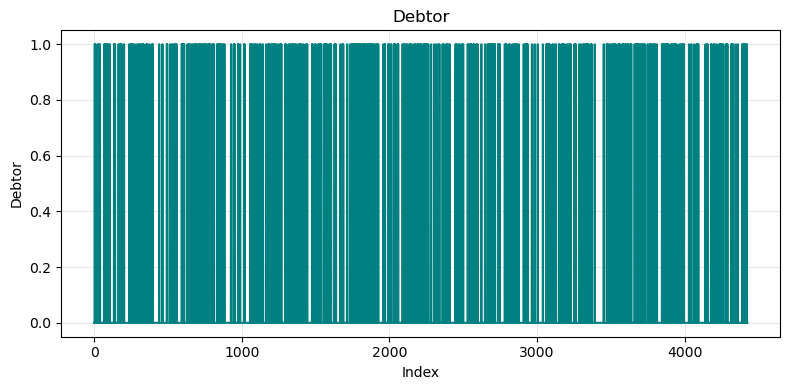

Tuition fees up to date


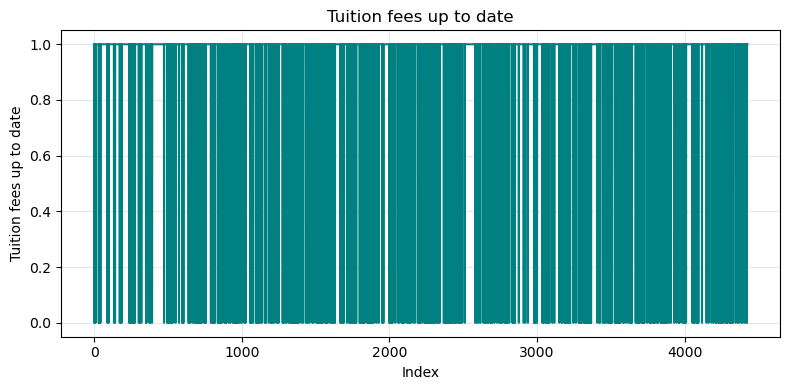

Gender


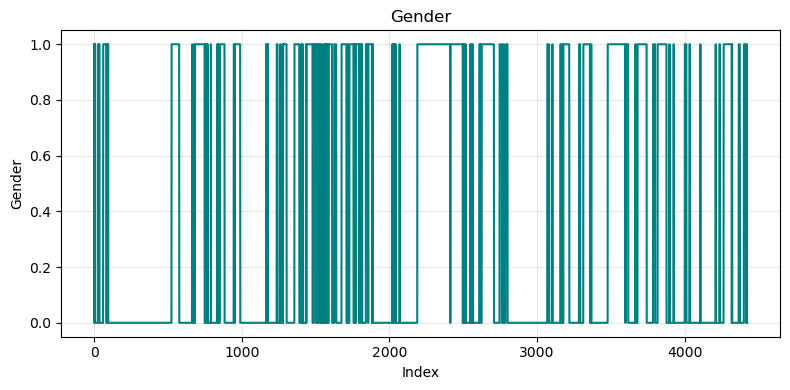

Scholarship holder


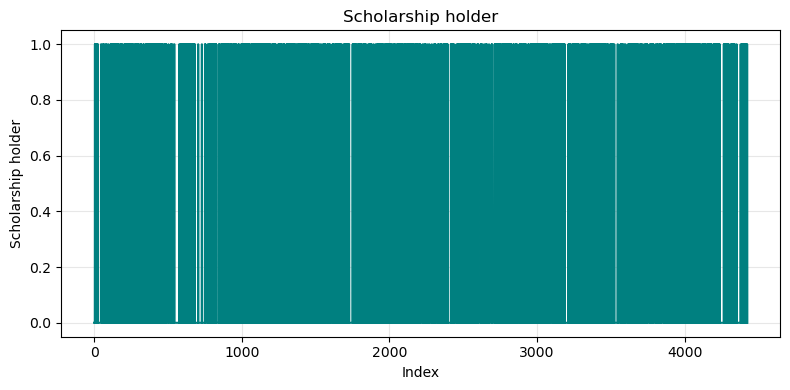

Age at enrollment


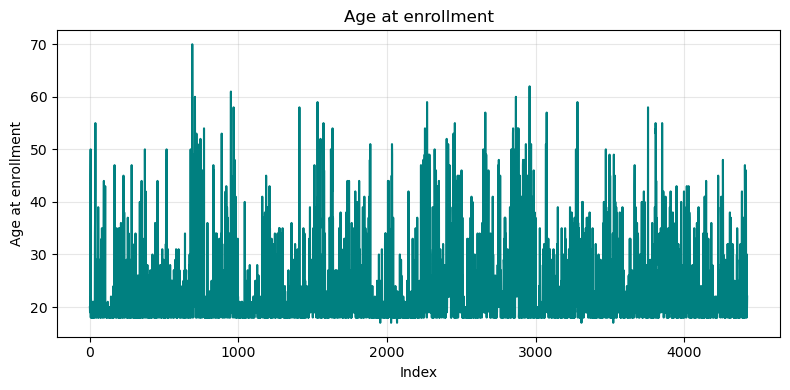

International


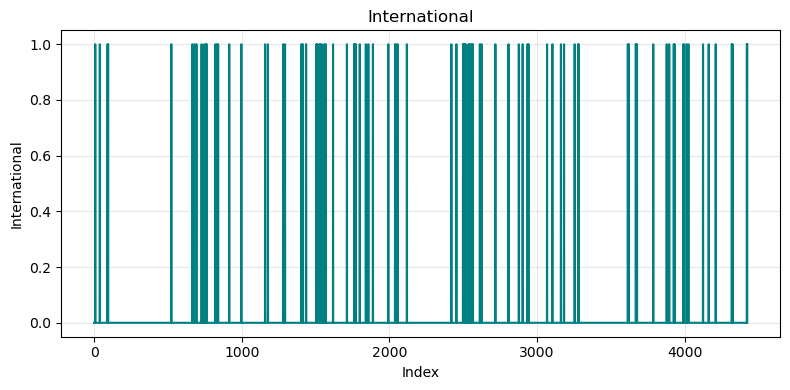

Curricular units 1st sem (credited)


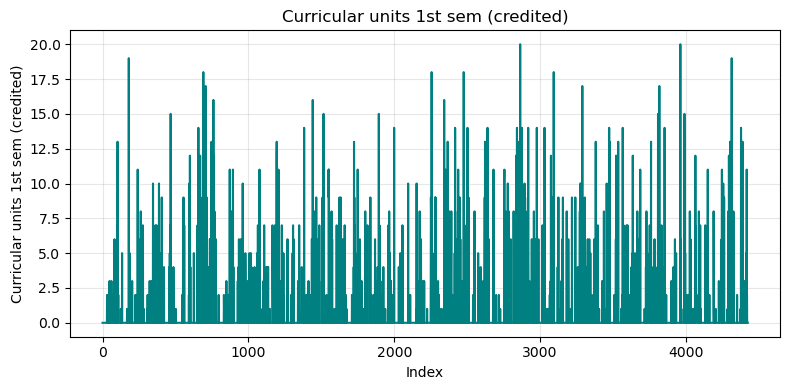

Curricular units 1st sem (enrolled)


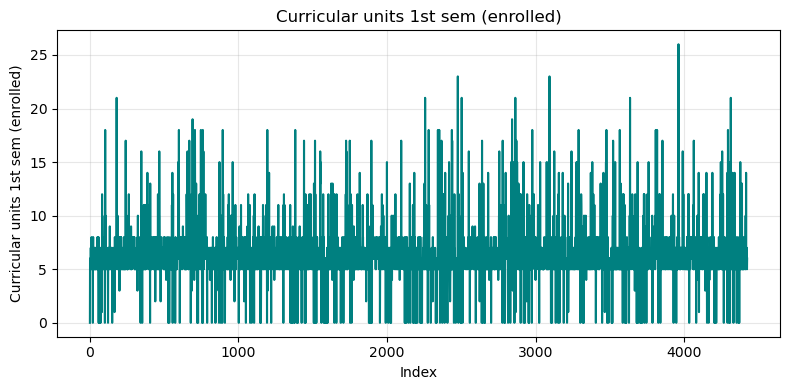

Curricular units 1st sem (evaluations)


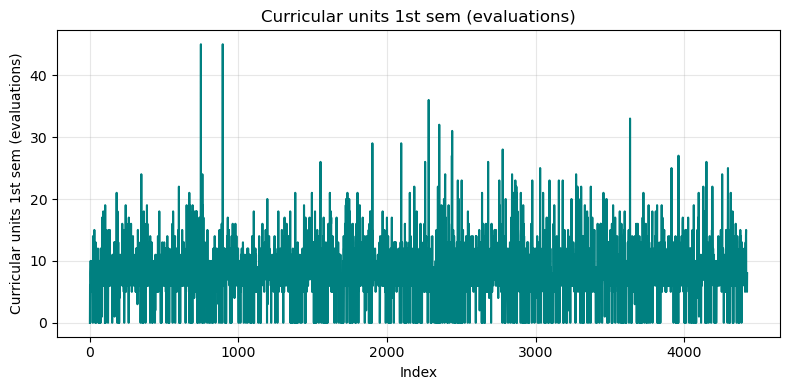

Curricular units 1st sem (approved)


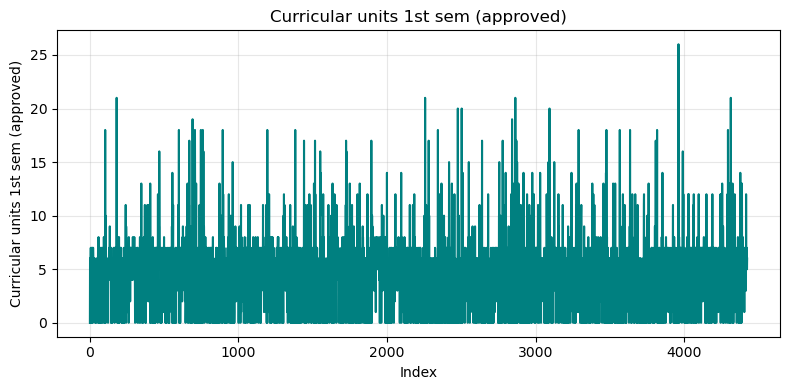

Curricular units 1st sem (grade)


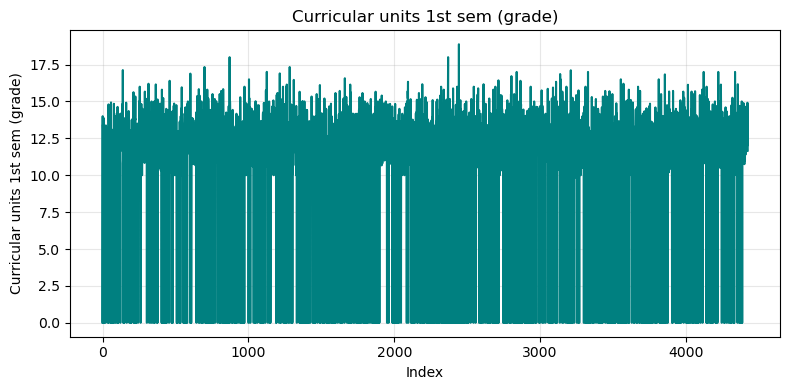

Curricular units 1st sem (without evaluations)


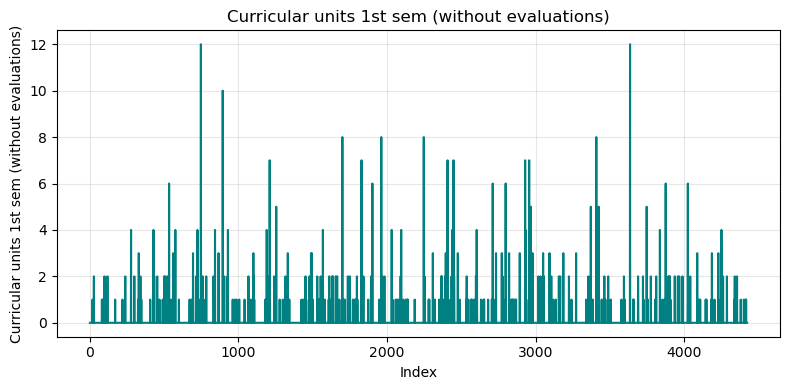

Curricular units 2nd sem (credited)


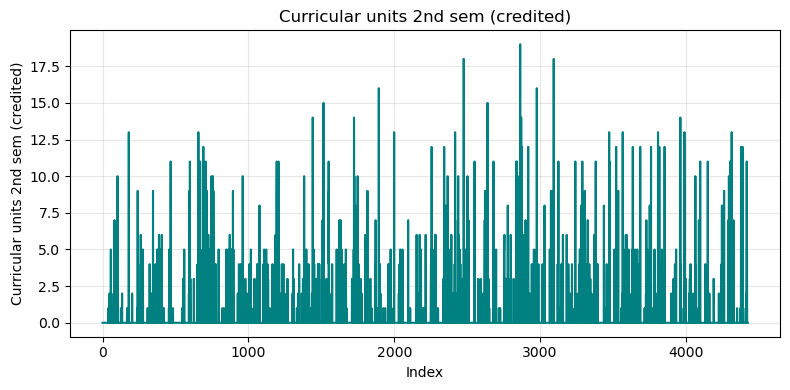

Curricular units 2nd sem (enrolled)


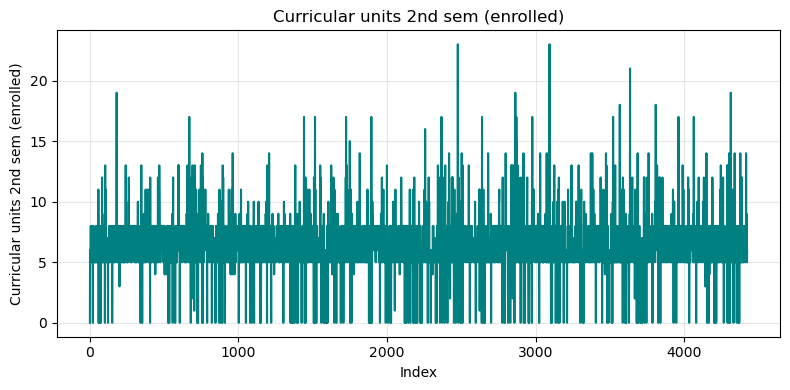

Curricular units 2nd sem (evaluations)


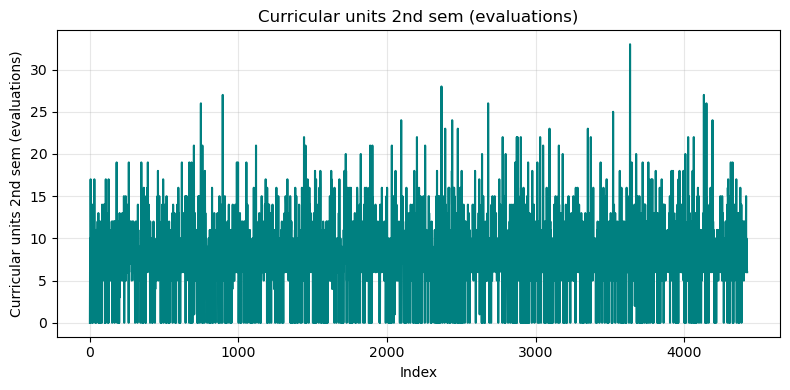

Curricular units 2nd sem (approved)


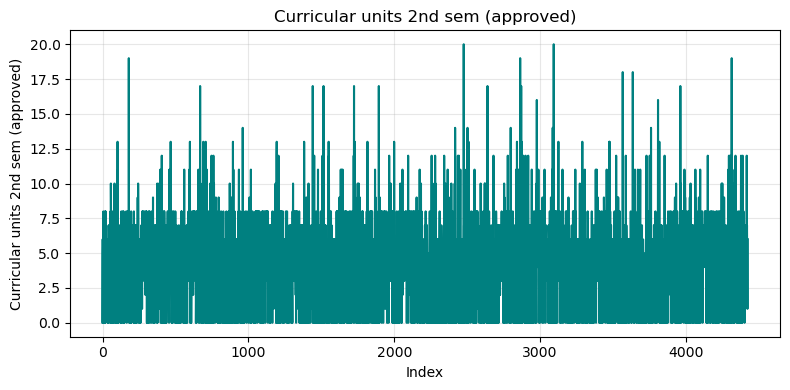

Curricular units 2nd sem (grade)


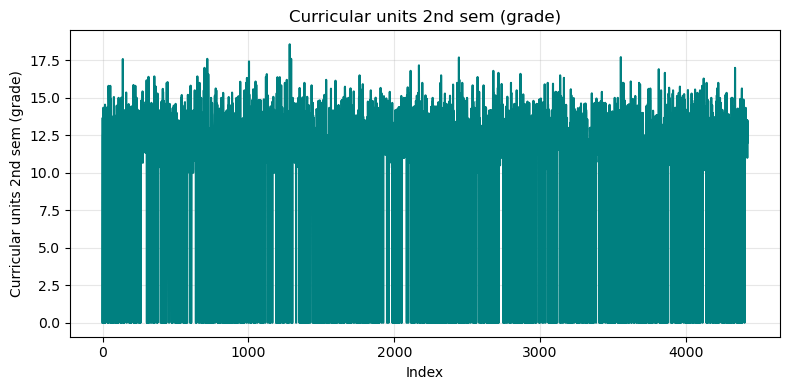

Curricular units 2nd sem (without evaluations)


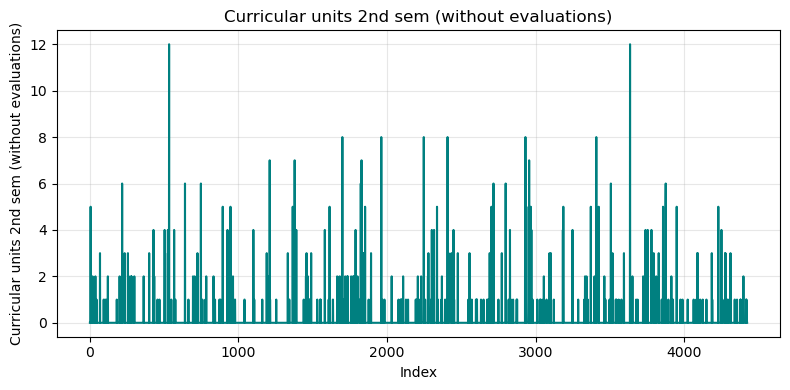

Unemployment rate


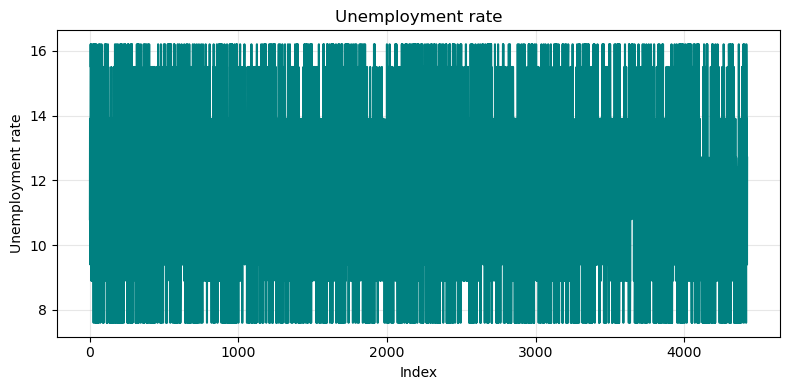

Inflation rate


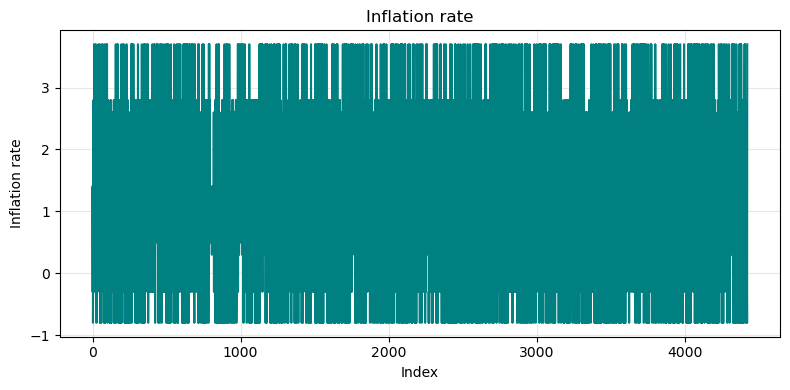

GDP


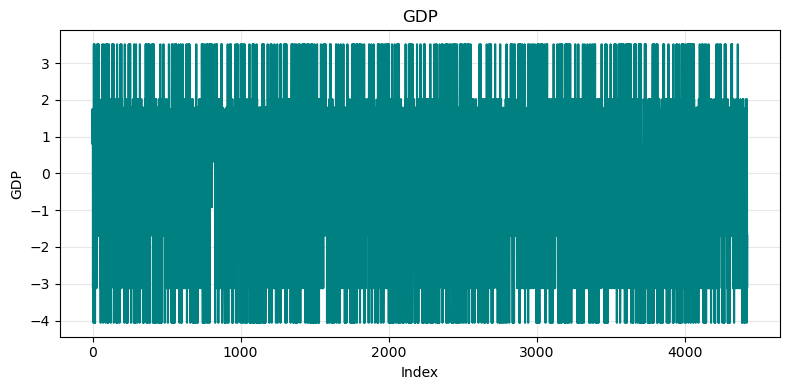

In [ ]:
#generates a line plot for each feature to visualize how each feature’s values vary  
for column in features.columns:
    print(column)
    
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=features.index, y=features[column], color='teal')
    
    plt.title(f"{column}", fontsize=12)
    plt.xlabel("Index")
    plt.ylabel(column)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

### **Step 2:** Data Pre-processing

- The dataset is already numerical, only the `'Target'` column requires encoding.  
- There are no missing values in the dataset.  
- All data has already been merged into a single CSV file.  
- Based on our inspection, the dataset is clean and does not require additional pre-processing.  
- We only need to reduce the number of features and keep only the relevant ones, because irrelevant features can decrease the accuracy and performance of many models.

### **1. 'Target' Encoding**  
   - `'Dropout'` → `1`  
   - `'Enrolled'` or `'Graduate'` → `0`  

In [14]:
data['Target'] = data['Target'].replace({'Dropout': 1, 'Enrolled': 0, 'Graduate': 0})

C:\Users\YOGA\AppData\Local\Temp\ipykernel_8368\3935248593.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Target'] = data['Target'].replace({'Dropout': 1, 'Enrolled': 0, 'Graduate': 0})


In [15]:
data['Target'].head(5)

0    1
1    0
2    1
3    0
4    0
Name: Target, dtype: int64

### **2. Features Reduction**  


Used `SelectKBest` + `f_classif` to extract the top 15 features.   
→ Goal: Identify strongest predictors of dropout.

In [18]:
#seperating features and target
X = data.drop('Target', axis=1)
y = data['Target']

#applying the SelectKBest
selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X, y)

#get selected feature names and their scores
selected_features = X.columns[selector.get_support()]
scores = selector.scores_[selector.get_support()]

#create a df for each feature and their score
top_features = pd.DataFrame({
    'Feature': selected_features,
    'Score': scores
}).sort_values(by='Score', ascending=False).reset_index(drop=True)
print(top_features)


                                   Feature        Score
0         Curricular units 2nd sem (grade)  2148.055485
1      Curricular units 2nd sem (approved)  2122.620090
2         Curricular units 1st sem (grade)  1328.644788
3      Curricular units 1st sem (approved)  1317.490529
4                  Tuition fees up to date   998.240942
5                        Age at enrollment   305.518224
6                       Scholarship holder   283.249150
7                                   Debtor   245.647627
8                                   Gender   191.982773
9                         Application mode   181.303785
10  Curricular units 2nd sem (evaluations)   108.851844
11     Curricular units 2nd sem (enrolled)    90.366798
12     Curricular units 1st sem (enrolled)    69.774180
13                               Displaced    51.439121
14                         Admission grade    40.964640


In [ ]:
#create a new data frame with only 15 features with the encoded 'Target'
data15 = pd.concat([data[selected_features], y], axis=1)
data15.shape

(4424, 16)

15 features + `'Target'` value (class)  
4424 line

### **Step 3:** Model Training 

In [ ]:
#X: features & y: 'Target ' class
X = data15.drop('Target', axis=1)
y = data15['Target']

In the original paper, the authors used the following classification models: `KNN`, `Decision Tree`, `Random Forest`, `SVM`, and `Naive Bayes`.  
In our project, we additionally included the `XGBoost` model to evaluate whether it could achieve better performance.

In [ ]:
#ML models initialization
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42), #n_estimator = 100 : number of trees
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),  #use Gaussian kernel
    "Naive Bayes": GaussianNB(),
		"XGBoost": XGBClassifier(
			n_estimators=100,
			learning_rate=0.1, #how fast the model learns
			max_depth=5, #each tree can have a maximum depth of 5 levels
			random_state=42,
			use_label_encoder=False, #avoids warning message (tells XGBoost my labels are fine don't change them) 
			eval_metric='logloss' #measures how well probabilities match true labels
    )
}

In the paper, they use **cross-validation** instead of the traditional **train/validation/test split** because   cross-validation makes better use of the available data, avoids losing information. Also, it ensures that every  sample is used for both training and testing across different folds.


In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# n_splits=10** : data is splited into 10 equal parts  
# shuffle=True** : randomly shuffles the dataset before splitting into folds.  
# random_state=42** : guarantees you get the same shuffling every time you run the code

In [ ]:
#train and evaluate all the models using cross validation
results = []

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    #cross_val_score handle both training and evaluation (default = accuracy)
    avg_score = np.mean(scores) * 100 #avg score for all the folds
    results.append({"Model": name, "Average Accuracy (%)": round(avg_score, 2)})

c:\Users\YOGA\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:44:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\YOGA\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:44:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\YOGA\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:44:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\YOGA\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:44:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

### **Step 4:** Model Evaluation 

#### **1. Accuracy** 

In [ ]:
results_df = pd.DataFrame(results).sort_values(by="Average Accuracy (%)", ascending=False)
print(results_df.to_string(index=False))

        Model  Average Accuracy (%)
      XGBoost                 87.09
Random Forest                 86.80
  Naive Bayes                 83.93
          KNN                 82.37
          SVM                 81.10
Decision Tree                 80.04


#### **2. Confusion Matrix** 

In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

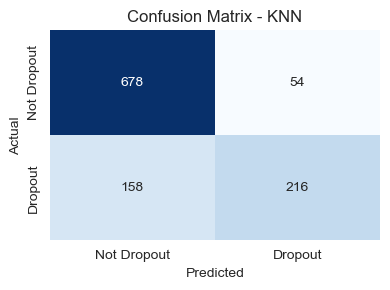

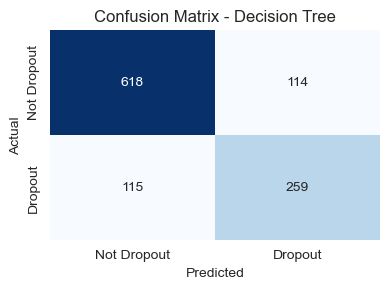

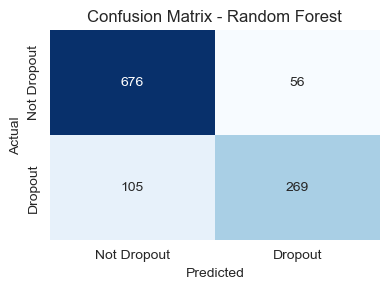

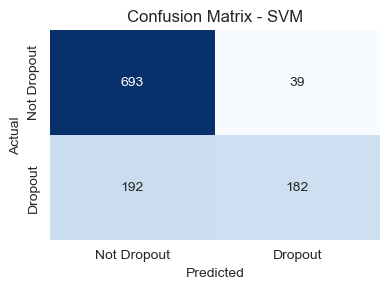

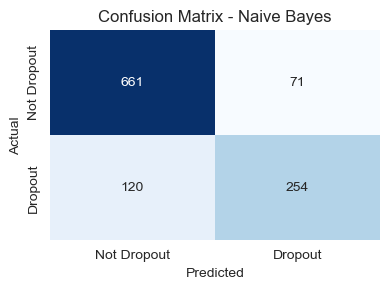

c:\Users\YOGA\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:04:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


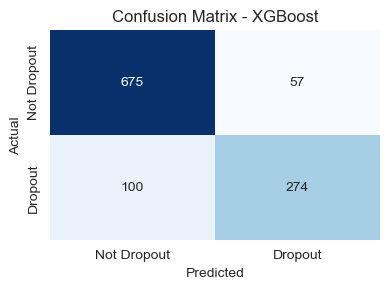

        Model  TP  TN  FP  FN
          KNN 216 678  54 158
Decision Tree 259 618 114 115
Random Forest 269 676  56 105
          SVM 182 693  39 192
  Naive Bayes 254 661  71 120
      XGBoost 274 675  57 100


In [ ]:
results1 = []

for name, model in models.items():
    model.fit(X_train, y_train) # train model
    y_pred = model.predict(X_test) # predict the target values for the test set

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)  
    tn, fp, fn, tp = cm.ravel() #ravel() => flatten 2x2 matrix

    # Store results in a dictionary and add it to the list
    results1.append({
        "Model": name, 
        "TP": tp,  # True Positives — correctly predicted dropouts
        "TN": tn,  # True Negatives — correctly predicted non-dropouts
        "FP": fp,  # False Positives — predicted dropout but actually not
        "FN": fn   # False Negatives — predicted not dropout but actually dropout
    })

		## Plot Confusion Matrix --
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Not Dropout', 'Dropout'],
                yticklabels=['Not Dropout', 'Dropout'])
    
    plt.title(f"Confusion Matrix - {name}")
    plt.ylabel("Actual")    
    plt.xlabel("Predicted")  
    plt.tight_layout()
    plt.show()

results1_df = pd.DataFrame(results1)
print(results1_df.to_string(index=False))


#### **3. Precision | Recall | F1-Score** 

In [ ]:
results2 = []

for name, model in models.items():
	model.fit(X_train, y_train)
	y_pred = model.predict(X_test)
	
	precision = precision_score(y_test, y_pred)  # Correctly predicted positives / all predicted positives
	recall = recall_score(y_test, y_pred)        # Correctly predicted positives / all actual positives
	f1 = f1_score(y_test, y_pred)                # Harmonic mean of precision and recall

	results2.append({
			"Model": name,
			"Precision (%)": round(precision * 100, 2),
			"Recall (%)": round(recall * 100, 2),
			"F1-Score (%)": round(f1 * 100, 2)
	})
	
results2_df = pd.DataFrame(results2)
print(results2_df.to_string(index=False))


        Model  Precision (%)  Recall (%)  F1-Score (%)
          KNN          80.00       57.75         67.08
Decision Tree          69.44       69.25         69.34
Random Forest          82.77       71.93         76.97
          SVM          82.35       48.66         61.18
  Naive Bayes          78.15       67.91         72.68
      XGBoost          82.78       73.26         77.73


c:\Users\YOGA\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:44:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


#### **4. ROC accuracy score**  
Receiver Operating Characteristic accuracy score: tells you how well the model can tell the difference between classes.

c:\Users\YOGA\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:45:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


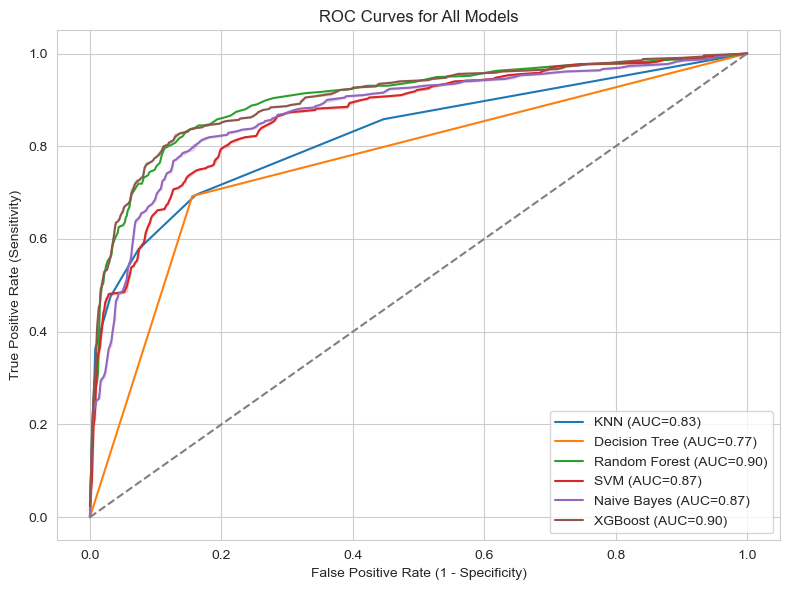

        Model  ROC AUC (%)
Random Forest        90.18
      XGBoost        90.17
  Naive Bayes        87.32
          SVM        86.70
          KNN        82.50
Decision Tree        76.84


In [ ]:
roc_results = []

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1] # probability of positive class (Dropout = 1)
    auc_score = roc_auc_score(y_test, y_pred_proba) # Calculate the Area Under the ROC Curve (AUC score)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba) # ROC curve points - False Positive Rate (FPR) and True Positive Rate (TPR)

    roc_results.append({"Model": name, "ROC AUC (%)": round(auc_score * 100, 2)})
    sns.lineplot(x=fpr, y=tpr, label=f"{name} (AUC={auc_score:.2f})")

#-- Plot ROC Curves --
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # diagonal line
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend()
plt.tight_layout()
plt.show()

roc_df = pd.DataFrame(roc_results).sort_values(by="ROC AUC (%)", ascending=False).reset_index(drop=True)
print(roc_df.to_string(index=False))

- AUC (Area Under Curve)  = 1.0 → perfect classifier  
- AUC = 0.5 → random guessing  

**Higher AUC = better class separation** 

### **Interpretations**

| Model | AUC Score (%) | Interpretation |
|--------|------------|----------------|
| **XGBoost** | **90.17** | Excellent performance; strong ability to distinguish between dropout and non-dropout students. |
| **Random Forest** | **90.18** | Close to XGBoost |
| **Naive Bayes & SVM** | **87.32 & 86.70** | Good performance but less powerful than ensemble models. |
| **KNN** | **82.50** | Moderate performance |
| **Decision Tree** | **76.84** | Weak model |


### **Conclusion:** 
--- 
**XGBoost** & **Random Forest** achieve the highest AUC scores.  
**=> They are the most reliable for predicting student dropout.**


#### **5. Precision–Recall (PR) Curve**  

Precision → of the students predicted as dropout, how many actually dropped out?  
Recall → of all real dropouts, how many did we correctly predict?  
The PR curve plots Precision vs Recall  
**The closer the curve is to the top-right = better performance**

c:\Users\YOGA\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:47:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


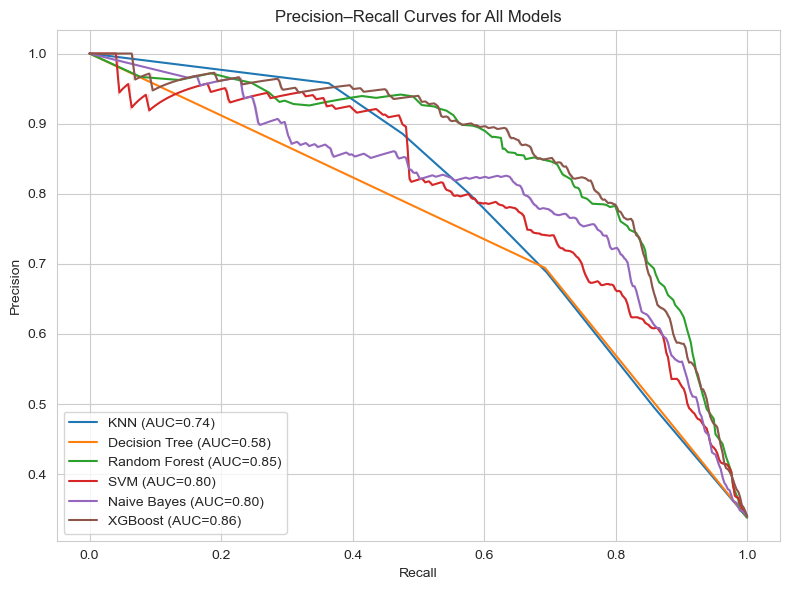

        Model  PR AUC (%)
      XGBoost       85.68
Random Forest       84.90
  Naive Bayes       80.31
          SVM       79.93
          KNN       73.86
Decision Tree       58.48


In [ ]:
pr_results = []

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

for name, model in models.items():
	model.fit(X_train, y_train)
	y_pred_proba = model.predict_proba(X_test)[:, 1]

	# Compute precision and recall values at different probability
	precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
	# Calculate the Average Precision (area under the Precision-Recall curve)
	pr_auc = average_precision_score(y_test, y_pred_proba)

	pr_results.append({"Model": name, "PR AUC (%)": round(pr_auc * 100, 2)})

	sns.lineplot(x=recall, y=precision, label=f"{name} (AUC={pr_auc:.2f})")

#-- Plot PR Curves --
plt.title("Precision–Recall Curves for All Models")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.tight_layout()
plt.show()

pr_df = pd.DataFrame(pr_results).sort_values(by="PR AUC (%)", ascending=False).reset_index(drop=True)
print(pr_df.to_string(index=False))

### **Interpretations**

| Model | PR AUC (%) | Interpretation |
|--------|-------------|----------------|
| **XGBoost** | **85.68** | Excellent; maintains a strong balance between precision and recall.|
| **Random Forest & Naive Bayes** | **84.90 & 80.31** | Performs almost as well as XGBoost|
| **SVM & KNN** | **79.93 & 73.86** | Less stable than ensemble models. |
| **Decision Tree** | **58.48** | Poor; lowest PR AUC. |

### **Conclusion**
---
**XGBoost** & **Random Forest** demonstrate the best balance between precision and recall, making them the most reliable models for identifying dropout students.

---
---

### **Analysis of Feature Importance Using XGBoost Classifier**
identify which features are most important for predicting student dropout.

c:\Users\YOGA\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:57:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\YOGA\AppData\Local\Temp\ipykernel_1972\43438602.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_importance, x='Importance', y='Feature', ax=axes[0], palette='viridis')
C:\Users\YOGA\AppData\Local\Temp\ipykernel_1972\43438602.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_importance, x='Importance', y='Feature', ax=axes[1], palette='crest')


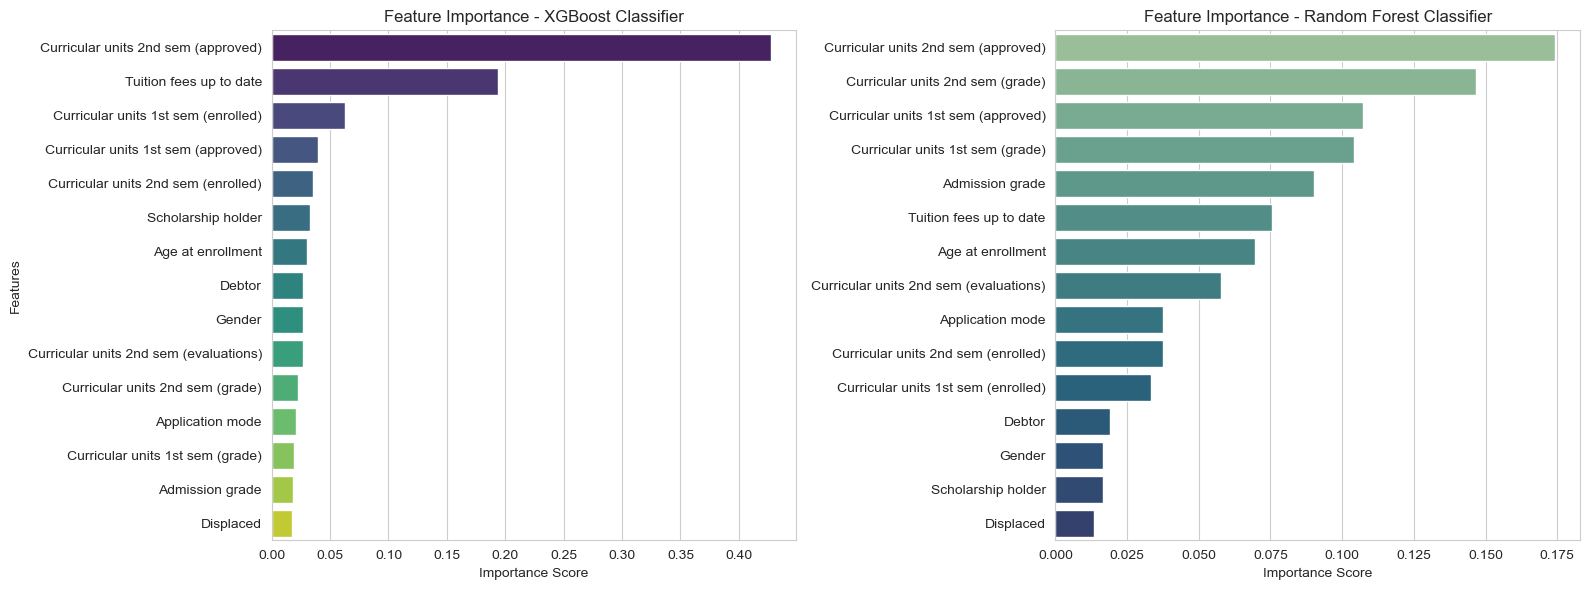

In [ ]:
# --- XGBoost Model ---
xgb_model = XGBClassifier(
			n_estimators=100,
			learning_rate=0.1, 
			max_depth=5,
			random_state=42,
			use_label_encoder=False,
			eval_metric='logloss' 
    )
xgb_model.fit(X, y)
xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# --- Random Forest Model ---
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X, y)
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# ------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style("whitegrid")

# XGBoost plot
sns.barplot(data=xgb_importance, x='Importance', y='Feature', ax=axes[0], palette='viridis')
axes[0].set_title('Feature Importance - XGBoost Classifier', fontsize=12)
axes[0].set_xlabel('Importance Score')
axes[0].set_ylabel('Features')

# Random Forest plot
sns.barplot(data=rf_importance, x='Importance', y='Feature', ax=axes[1], palette='crest')
axes[1].set_title('Feature Importance - Random Forest Classifier', fontsize=12)
axes[1].set_xlabel('Importance Score')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


### **Interpretations**
---
Both models identified academic performance indicators as the strongest predictors, especially:
  - *Curricular units 2nd semester (approved)*  
  - *Curricular units 1st semester (approved / enrolled)*  
  - *Tuition fees up to date*  
  - *Admission grade*  

## **Final Conclusion**

This project successfully reproduced and extended the study *"A Machine Learning Approach to Detect Student Dropout at University"* by Shohag & Bakaul (2021).  
Through detailed data exploration, preprocessing, feature selection, and model evaluation, we aimed to identify the most effective machine learning models for predicting student dropout.

Our analysis revealed that **XGBoost** and **Random Forest** achieved the **highest overall performance**, with accuracies around **88–89%**, outperforming traditional models such as KNN, SVM, and Naive Bayes.  
Both models consistently highlighted **academic performance indicators** (e.g., approved curricular units, admission grade) and **financial regularity** (tuition fee status) as the strongest predictors of student retention.

The ROC and Precision–Recall curves confirmed that these ensemble models not only achieved high accuracy but also maintained robust balance between **precision** and **recall**, making them reliable for real-world deployment.

In conclusion, the project demonstrates that **machine learning can effectively predict student dropout** with high accuracy, enabling universities to:
- Detect at-risk students early.  
- Provide targeted support.  
- Reduce overall dropout rates efficiently.  

This work validates the potential of data-driven decision systems as valuable tools in educational management, offering a fast, precise, and scalable alternative to traditional manual analysis.
